In [59]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from prettytable import PrettyTable

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from statsmodels.tools.eval_measures import mse, rmse
from math import sqrt

In [ ]:
data_dir = '/input'

In [4]:
global_temp_df = pd.read_csv(os.path.join(data_dir, 'climate-change-earth-surface-temperature-data', 'GlobalTemperatures.csv'))

In [5]:
print(global_temp_df.shape)
print(global_temp_df.head(5))

(3192, 9)
           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0       

In [6]:
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [7]:
# Utility functions

def date_to_datetime(df):
    df = df.copy()
    df['dt'] = pd.to_datetime(df['dt'])
    df['Month'] = df['dt'].dt.month
    df['Year'] = df['dt'].dt.year
    return df

def celsius_to_fahrenheit(temp_cel):
    temp_fhr = (temp_cel * 1.8) + 32;
    return temp_fhr

def reduce_df(df):
  df = df.copy()
  drop_cols = ['LandMaxTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty',
                'LandAverageTemperatureUncertainty','LandMinTemperatureUncertainty']
  df = df.drop(drop_cols, axis=1)
  return df

In [8]:
main_cols = ['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature']
global_temp_df[main_cols] = global_temp_df[main_cols].apply(celsius_to_fahrenheit)

In [9]:
global_temp_df.head(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,37.4612,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,37.5494,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,42.1268,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,47.2820,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,52.8314,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
global_temp_df_new = date_to_datetime(global_temp_df)
global_temp_df_new = global_temp_df_new.drop(['Month', 'dt'], axis=1)

In [11]:
global_temp_df_new = global_temp_df_new.set_index('Year')
global_temp_df_new.head(5)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,37.4612,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750,37.5494,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750,42.1268,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750,47.2820,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750,52.8314,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
global_temp_df_new.isnull().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [13]:
global_temp_df_cleaned = global_temp_df_new[global_temp_df_new.index >=1850]
global_temp_df_cleaned.isnull().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [14]:
# Plot functions

def plot_average_temp(df, col1, col2, label):
  cols = [col1, col2]
  global_temp_df = df[cols]
  avg_per_year = global_temp_df.groupby(global_temp_df.index)[cols].mean()
  avg_per_year['Temp. (Lower)'] = avg_per_year[col1] - avg_per_year[col2]
  avg_per_year['Temp. (Upper)'] = avg_per_year[col1] + avg_per_year[col2]

  plt.figure(figsize=(12,6))
  plt.plot(avg_per_year.index, avg_per_year[col1], color='red', label='Average')
  plt.plot(avg_per_year.index, avg_per_year['Temp. (Upper)'], color='blue', alpha=0.3)
  plt.plot(avg_per_year.index, avg_per_year['Temp. (Lower)'], color='blue', alpha=0.3)
  plt.fill_between(avg_per_year.index, avg_per_year['Temp. (Upper)'], avg_per_year['Temp. (Lower)'], color='lightblue', alpha=0.3, label='Temp. Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Avg. Temp.')
  plt.title(label)
  plt.legend(loc='best')

def plot_corr_matrix(df, col1, col2):
    fig, ax = plt.subplots(figsize=(8,6))
    corr_matrix = np.abs(df.corr())
    sns.heatmap(df.corr()[[col1]].sort_values(col2).tail(10),
     vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
    ax.invert_yaxis()

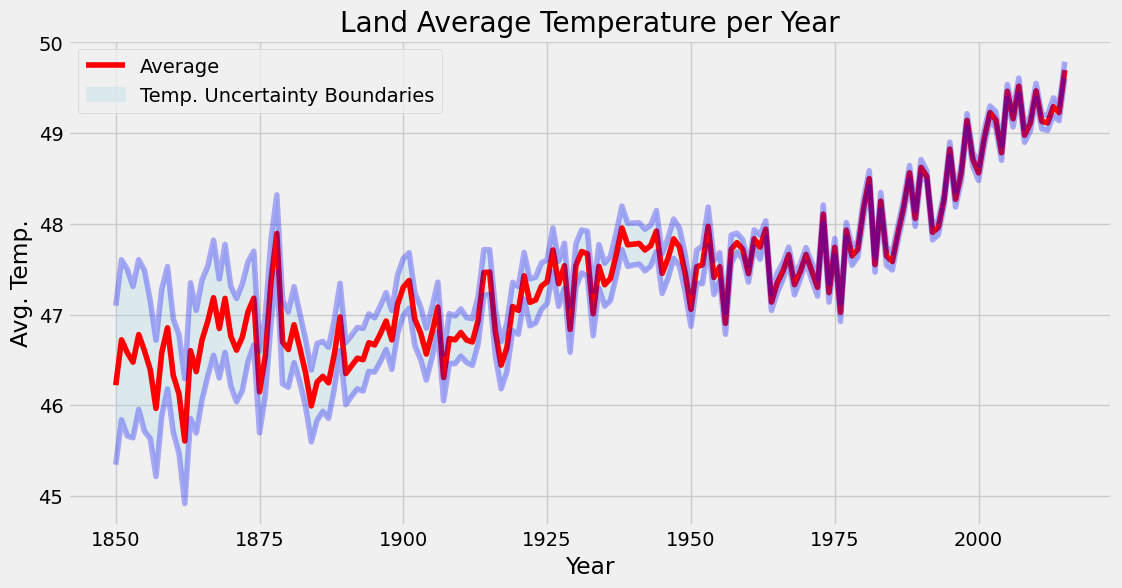

In [15]:
plot_average_temp(global_temp_df_cleaned,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')

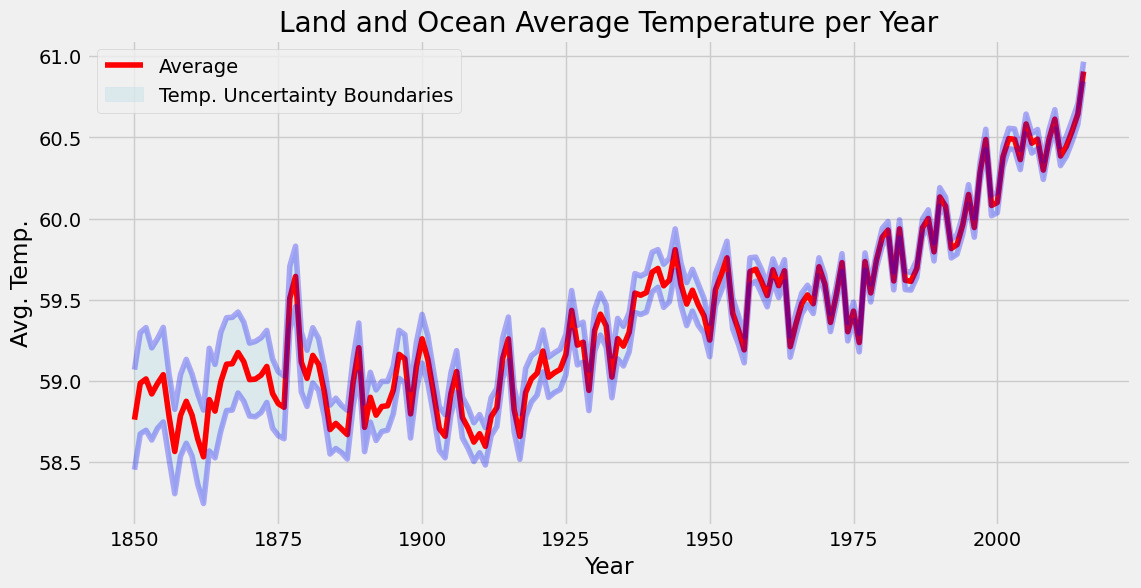

In [16]:
plot_average_temp(global_temp_df_cleaned,'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','Land and Ocean Average Temperature per Year')

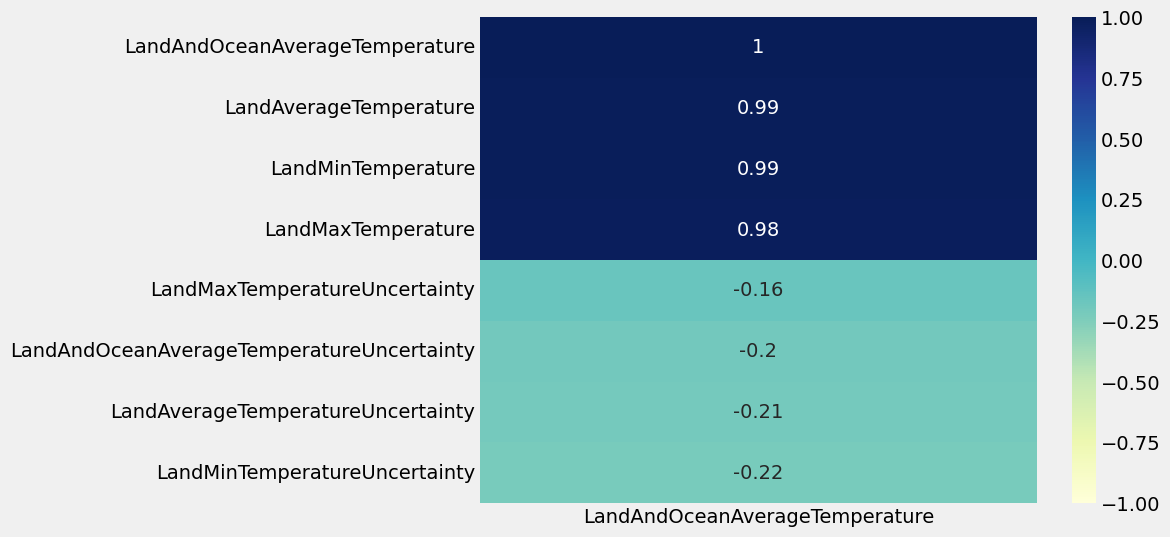

In [17]:
plot_corr_matrix(global_temp_df_cleaned, 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperature')

In [18]:
global_temp_df_reduced = reduce_df(global_temp_df_cleaned)

In [19]:
X = global_temp_df_reduced.drop('LandAndOceanAverageTemperature',axis=1)
Y = global_temp_df_reduced['LandAndOceanAverageTemperature']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (1494, 3)
Size of X_test:  (498, 3)
Size of y_train:  (1494,)
Size of y_test:  (498,)


In [34]:
class MLModel:
    def __init__(self, model, X_train, X_test, y_train, y_test):
        
        self.model = model
        self.model_name = type(self.model).__name__
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.y_pred_train = None
        self.y_pred_test = None
        
        self.test_stats = {
            'R2 score': 0.0,
            'MAE': 0.0,
            'MSE': 0.0,
            'RMSE': 0.0,
        }
        
    def fit(self):
        self.model.fit(self.X_train, self.y_train)
        
        self.y_pred_train = self.model.predict(self.X_train)
        self.y_pred_test = self.model.predict(self.X_test)
        
        self.plot(best_fit=True)
        
    def plot(self, best_fit=False):
        plt.scatter(self.y_test, self.y_pred_test, color='purple', alpha=0.3, label='Ground Truth Vs Predictions')
        
        if best_fit:
            regressor = LinearRegression()
            regressor.fit(self.y_test.to_numpy().reshape(-1, 1), self.y_pred_test)
            y_line = regressor.predict(self.y_test.to_numpy().reshape(-1, 1))
            
            plt.plot(self.y_test, y_line, color='red', linewidth=2, label='Best-fit Line')
            
        plt.xlabel('Ground Truth Values (y_test)')
        plt.ylabel('Predicted Values (y_pred)')
        plt.title(f'{self.model_name}: True Vs Predicted')
        plt.legend()
        
        plt.show()
        
    def show_test_statistics(self):
        r2_val = self.model.score(self.X_test, self.y_test)
        mae_val = mean_absolute_error(self.y_test, self.y_pred_test)
        mse_val = mse(self.y_test, self.y_pred_test)
        rmse_val = rmse(self.y_test, self.y_pred_test)
        
        self.test_stats['R2 score'] = r2_val
        self.test_stats['MAE'] = mae_val
        self.test_stats['MSE'] = mse_val
        self.test_stats['RMSE'] = rmse_val
        
        print("Test Statistics")
        for stat in self.test_stats:
            print(f'{stat}: {self.test_stats[stat]:.3f}')

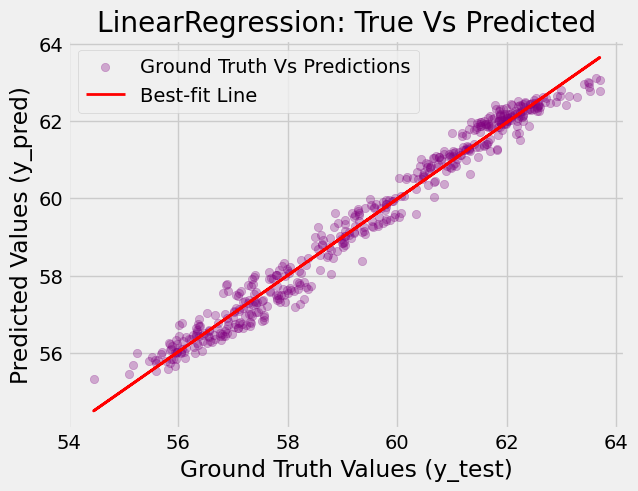

Test Statistics
R2 score: 0.979
MAE: 0.268
MSE: 0.111
RMSE: 0.334


In [51]:
model_LR = MLModel(LinearRegression(), X_train, X_test, y_train, y_test)
model_LR.fit()
model_LR.show_test_statistics()

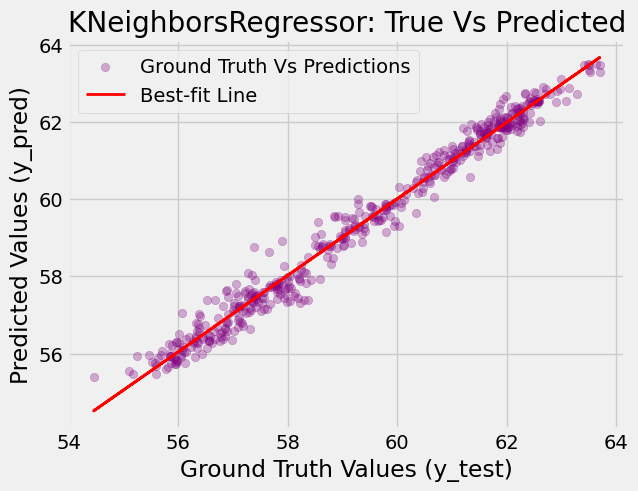

Test Statistics
R2 score: 0.981
MAE: 0.237
MSE: 0.101
RMSE: 0.318


In [37]:
model_KNN = MLModel(KNeighborsRegressor(n_neighbors=7), X_train, X_test, y_train, y_test)
model_KNN.fit()
model_KNN.show_test_statistics()

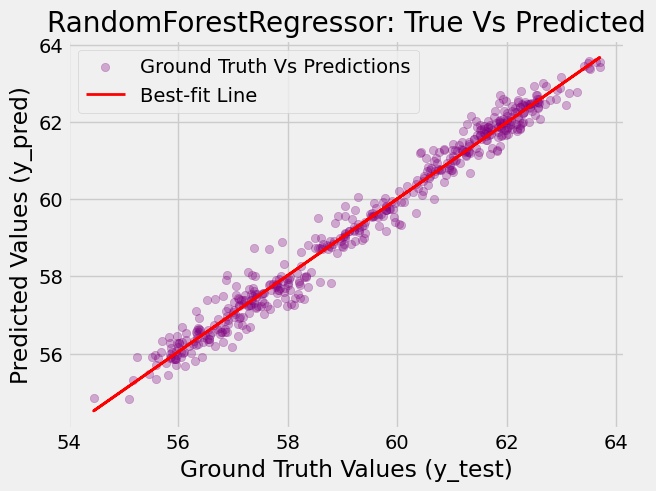

Test Statistics
R2 score: 0.979
MAE: 0.245
MSE: 0.111
RMSE: 0.333


In [40]:
model_RFR = MLModel(RandomForestRegressor(n_estimators=10, n_jobs=1), X_train, X_test, y_train, y_test)
model_RFR.fit()
model_RFR.show_test_statistics()

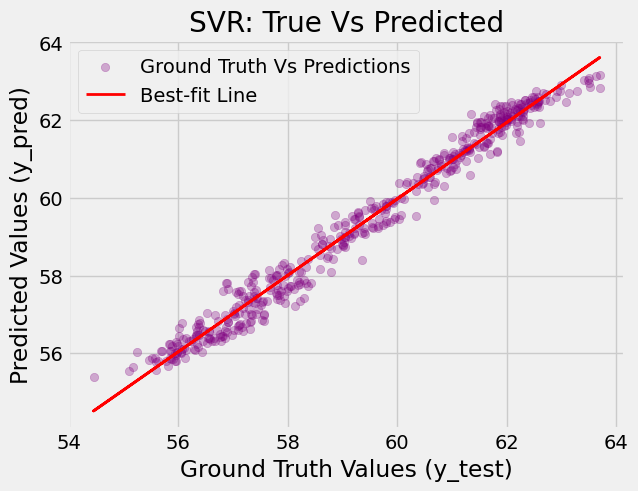

Test Statistics
R2 score: 0.979
MAE: 0.258
MSE: 0.108
RMSE: 0.328


In [41]:
model_SVR = MLModel(SVR(kernel='rbf'), X_train, X_test, y_train, y_test)
model_SVR.fit()
model_SVR.show_test_statistics()

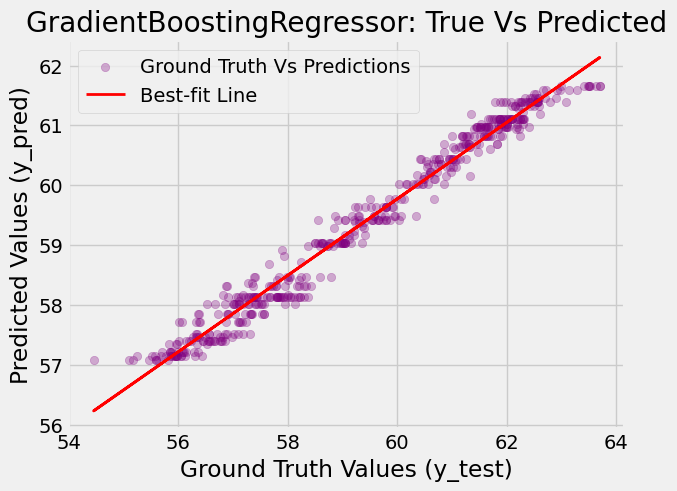

Test Statistics
R2 score: 0.860
MAE: 0.724
MSE: 0.729
RMSE: 0.854


In [44]:
model_GBR = MLModel(GradientBoostingRegressor(n_estimators=10), X_train, X_test, y_train, y_test)
model_GBR.fit()
model_GBR.show_test_statistics()

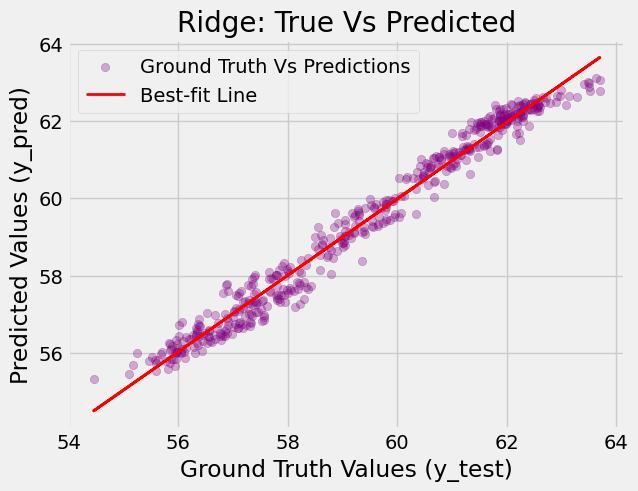

Test Statistics
R2 score: 0.979
MAE: 0.268
MSE: 0.111
RMSE: 0.334


In [45]:
model_RR = MLModel(Ridge(alpha=0.5), X_train, X_test, y_train, y_test)
model_RR.fit()
model_RR.show_test_statistics()

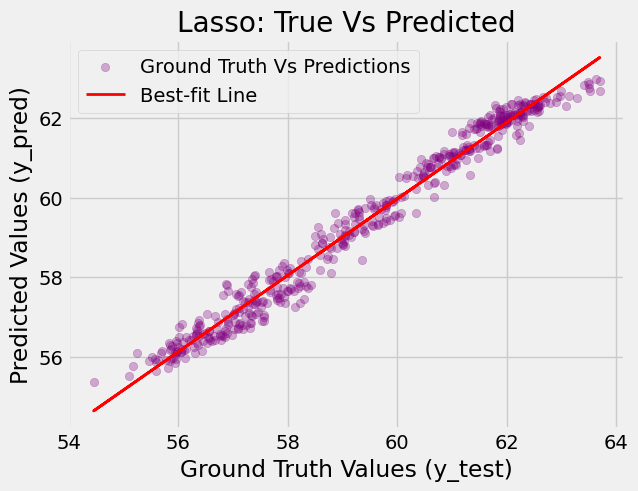

Test Statistics
R2 score: 0.978
MAE: 0.270
MSE: 0.114
RMSE: 0.337


In [50]:
model_LAR = MLModel(Lasso(alpha=0.5), X_train, X_test, y_train, y_test)
model_LAR.fit()
model_LAR.show_test_statistics()

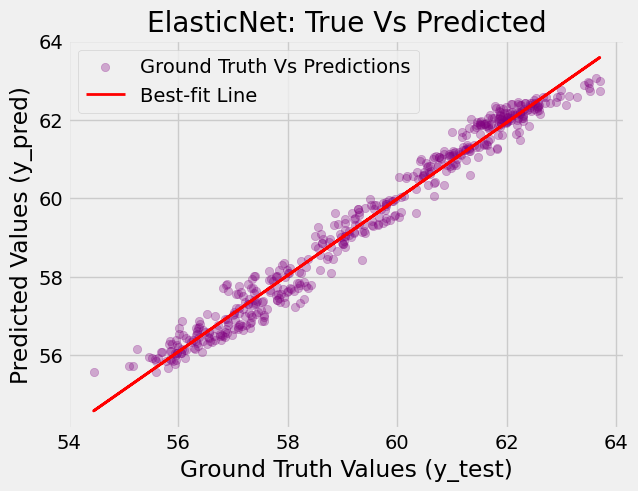

Test Statistics
R2 score: 0.978
MAE: 0.270
MSE: 0.116
RMSE: 0.340


In [47]:
model_ENR = MLModel(ElasticNet(alpha=0.5, l1_ratio=0.4), X_train, X_test, y_train, y_test)
model_ENR.fit()
model_ENR.show_test_statistics()

In [54]:
table = PrettyTable()
table.field_names = ("Model", "R2 Score", "MAE", "MSE", "RMSE")

model_stats = {}
for model in [model_LR, model_RFR, model_KNN, model_SVR, model_GBR, model_LAR, model_RR, model_ENR]:
    model_stats[model.model_name] = model.test_stats

In [58]:
for model_name, stats in model_stats.items():
    table.add_row([model_name, f"{stats['R2 score']:.5f}", f"{stats['MAE']:.5f}", f"{stats['MSE']:.5f}", f"{stats['MSE']:.5f}"])

print(table)

+---------------------------+----------+---------+---------+---------+
|           Model           | R2 Score |   MAE   |   MSE   |   RMSE  |
+---------------------------+----------+---------+---------+---------+
|      LinearRegression     | 0.97861  | 0.26790 | 0.11143 | 0.11143 |
|   RandomForestRegressor   | 0.97871  | 0.24545 | 0.11092 | 0.11092 |
|    KNeighborsRegressor    | 0.98059  | 0.23677 | 0.10112 | 0.10112 |
|            SVR            | 0.97937  | 0.25826 | 0.10750 | 0.10750 |
| GradientBoostingRegressor | 0.86005  | 0.72376 | 0.72912 | 0.72912 |
|           Lasso           | 0.97814  | 0.26966 | 0.11390 | 0.11390 |
|           Ridge           | 0.97861  | 0.26790 | 0.11144 | 0.11144 |
|         ElasticNet        | 0.97780  | 0.26992 | 0.11567 | 0.11567 |
+---------------------------+----------+---------+---------+---------+
